<a href="https://colab.research.google.com/github/rimchristian/sales-prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [ ]:
file_url = '/content/sales_predictions.csv'
filename = '/content/sales_predictions.csv'

In [ ]:
df = pd.read_csv(file_url)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Duplicated Data

 There are 8,523 rows and 12 columns

In [ ]:
#checks for duplicates
df.duplicated()
df.duplicated().sum()

0

## Missing Data

In [ ]:
# identifying missing data
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Outlet_Size'].fillna('Missing', inplace=True)

In [ ]:
# finding the average of the "item weight"
mean_item_weight = df['Item_Weight'].mean().round(2)
mean_item_weight

12.86

In [ ]:
df['Item_Weight'].fillna(mean_item_weight, inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
most_outlet_size = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna(most_outlet_size, inplace=True)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Standarlizing the Item Fat Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()


Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Standarlizing the Item Fat Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Standarlizing the Item Fat Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.860000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Histogram to display the distribution of the data**

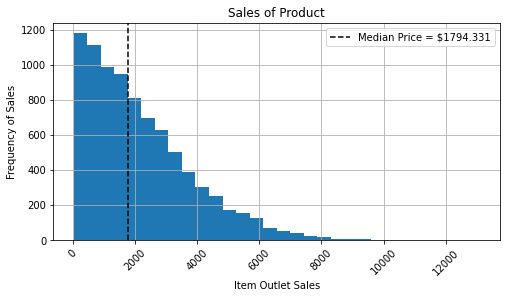

In [ ]:
plt.figure(figsize=(8,4))
df['Item_Outlet_Sales'].hist(bins=30)
plt.xticks(rotation=45)
plt.ticklabel_format(useOffset=False, style='plain') # removes scientific notation
plt.xticks(fontsize=10) # changing the fontsize of xticks

# making data labels for the histogram
plt.title('Sales of Product')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency of Sales')

# identifying the median
median = df['Item_Outlet_Sales'].median()     

plt.axvline(median, color='black', linestyle='--',
            label=f'Median Price = ${median}')

plt.legend();


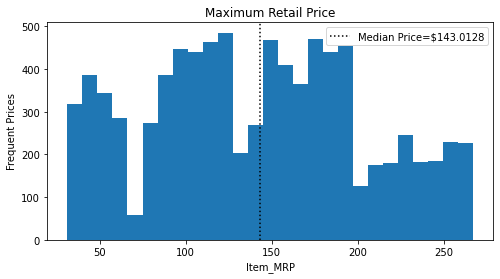

In [ ]:
#Maximum Retail Price Distribution - OOP with ax.set()
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['Item_MRP'],bins='auto');
ax.set(xlabel="Item_MRP", ylabel="Frequent Prices", 
       title='Maximum Retail Price');

median = df['Item_MRP'].median()
ax.axvline(median,color='k', ls=':', label=f"Median Price=${median}");
ax.legend();

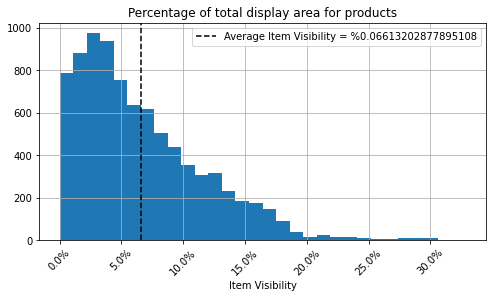

In [ ]:
from matplotlib.ticker import PercentFormatter

# creating a histogram based on item visilibty 
plt.figure(figsize=(8,4))
df['Item_Visibility'].hist(bins=30)
plt.xticks(rotation=45)
plt.ticklabel_format(useOffset=False, style='plain') # removes scientific notation
plt.xticks(fontsize=10) # changing the fontsize of xticks

# making data labels for the histogram
plt.title('Percentage of total display area for products')
plt.xlabel('Item Visibility')

# identifying the median
mean = df['Item_Visibility'].mean()   


plt.axvline(mean, color='black', linestyle='--',
            label=f'Average Item Visibility = %{mean}')

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.legend();


I also chose to visualize the item visilibty on a histogram to identify the convenience of the location of the product. This metric can be useful for store associates to assist customers looking for the product.  

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Boxplot Summary**

The below box plot shows a visual statistic summary of the Item Outlet Sales. The notable blue rectangular shaped box displays the median and the quartiles. Based on the skewness of the boxplot, this would be positive. There are a few outliers in this data column. We will explore these outliers later. 

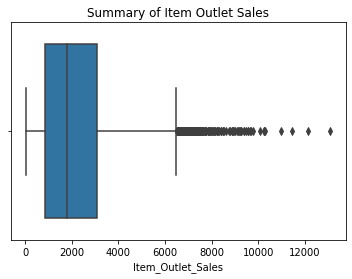

In [ ]:
# using seaborn to create a visual summary of the Item Outlet Sales variable 
sns.boxplot(data=df, x='Item_Outlet_Sales').set(title='Summary of Item Outlet Sales');

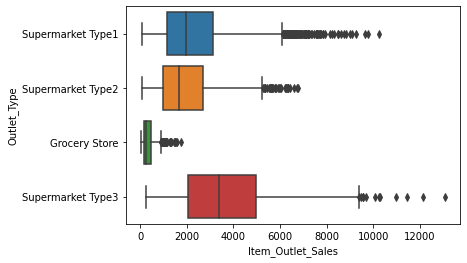

In [ ]:
# displays a boxplot of the item sales as well as the outlet type
sns.boxplot(data=df, x='Item_Outlet_Sales', y='Outlet_Type');

The above boxplot shows different summary based on different outlet type and its sales data.  The Supermarket Type 3 is spread out than the other types.  The longer the boxplot is, the dispersed the data is.  Looking at it now, the grocery store is a lot smaller than the supermarkets.

# **Heatmaps and Correlation**

With the correlation display summary, we can tell the 'Item Outlet Sales" and the 'Item MRP' have a pretty strong correlation with 0.567574.  

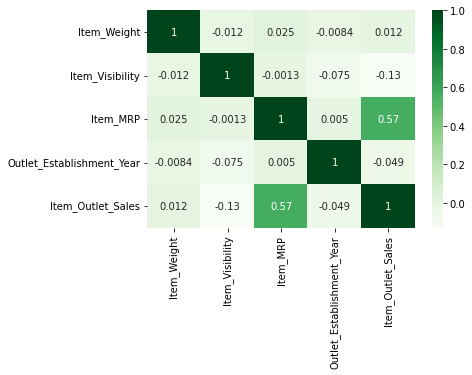

In [ ]:
# shows the correlation visually
sns.heatmap(corr,cmap='Greens', annot=True)

In [68]:
df['Item_Outlet_Sales'].drop_duplicates()
df['Item_MRP'].drop_duplicates()

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8509    213.9902
8510    231.5984
8514     57.5904
8518    214.5218
8522     75.4670
Name: Item_MRP, Length: 5938, dtype: float64

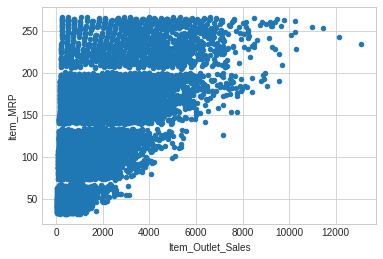

In [69]:
# Creating your first scatter chart in Pandas
df.plot(
   x='Item_Outlet_Sales', 
   y='Item_MRP', 
   kind='scatter'
)

plt.show()